# 1. Формирование фрейма данных

## Импорт необходимых библиотек

In [1]:
import pandas as pd
import json
import os

## Функция формирования датафрейма с данными патентов

1) Патенты парсятся в формате JSON
2) Патенты размещаются в локальной памяти
3) Создается экземпляр класса DataFrame библиотеки pandas
4) Файл JSON(он же - патент) разбивается на поля
5) Данные по конкретному JSON(по конкретному патенту) заносятся строку датафрейма
6) Строка в датафрейме - патент, столбцы в датафрейме - поля патента

In [2]:
def json_to_dataframe(json_file_path):
    if not os.path.exists(json_file_path):
        print("Файл не найден:", json_file_path)
        return None
    
    # Загрузка JSON из файла
    with open(json_file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    
    # Создание DataFrame
    df = pd.DataFrame({
        'id': [data.get('id')],
        'title': [data.get('title')],
        'assignee': [data.get('assignee')],
        'inventorOrAuthor': [data.get('inventorOrAuthor')],
        'priorityDate': [data.get('priorityDate')],
        'filingOrCreationDate': [data.get('filingOrCreationDate')],
        'publicationDate': [data.get('publicationDate')],
        'grantDate': [data.get('grantDate')],
        'abstract': [data.get('abstract')],
        'description': [data.get('description')],
        'urlGoogle': [data.get('urlGoogle')]
    })
    
    classifications = [{'id': c.get('id'), 'description': c.get('description')} for c in data.get('classifications', []) if all(key in c for key in ('id', 'description'))]
    df['classifications'] = [classifications]
    
    claims = [{'text': c.get('text'), 'index': c.get('index'), 'isDependent': c.get('isDependent')} for c in data.get('claims', []) if all(key in c for key in ('text', 'index', 'isDependent'))]
    df['claims'] = [claims]
    
    application_events = [{'date': e.get('date'), 'assignee': e.get('asignee')} for e in data.get('applicationEvents', []) if 'date' in e]
    df['applicationEvents'] = [application_events]
        
    return df

***Формирование датафрейма из одного патента(для примера)***

In [3]:
json_file_path = json_file_path = r'C:\Users\egor_\Desktop\Jupyter Notebook\Диплом\jsons\RU-165859-U1.json'
df_test = json_to_dataframe(json_file_path)

In [4]:
df_test.head()

,id,title,assignee,inventorOrAuthor,priorityDate,filingOrCreationDate,publicationDate,grantDate,abstract,description,urlGoogle,classifications,claims,applicationEvents
0,RU-165859-U1,Осветительное устройство,Федеральное государственное бюджетное образова...,"Флюр Рашитович Исмагилов, Ирек Ханифович Хайру...",2016-03-30,2016-03-30,2016-11-10,2016-11-10,"1. Осветительное устройство, состоящее из полу...",Заявляемая полезная модель относится к электро...,https://patents.google.com/patent/RU165859U1/ru,"[{'id': 'F21S9/02', 'description': 'Lighting d...","[{'text': '1. Осветительное устройство, состоя...","[{'date': '2016-03-30', 'assignee': 'Applicati..."


## Формирование датафрейма из всех патентов (*all_data*)

1) Создается экземпляр класса DataFrame библиотеки pandas
2) Файлы JSON(они же - патенты) разбиваются на поля
3) Данные по каждому JSON(по каждому патенту) заносятся в новую строку датафрейма
4) Строки в датафрейме - патенты, столбцы в датафрейме - поля патентов

In [5]:
# Папка с JSON-файлами
folder_path = r'C:\Users\egor_\Desktop\Jupyter Notebook\Диплом\jsons'

# Создание пустого DataFrame
all_data = pd.DataFrame()

# Перебор файлов в папке
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        # Преобразование JSON в DataFrame и добавление в общий DataFrame
        df_single = json_to_dataframe(file_path)
        if df_single is not None:
            all_data = pd.concat([all_data, df_single], ignore_index=True)

***вывод данных по одному патенту***

In [6]:
all_data.loc[all_data['id'] == 'RU-167140-U1']

,id,title,assignee,inventorOrAuthor,priorityDate,filingOrCreationDate,publicationDate,grantDate,abstract,description,urlGoogle,classifications,claims,applicationEvents
9,RU-167140-U1,"Светодиодный светильник ""светоматик рефлекс""",Олег Юрьевич Николаев,Олег Юрьевич Николаев,2015-12-24,2015-12-24,2016-12-27,2016-12-27,"1. Светодиодный светильник, характеризующийся ...",Полезная модель относится к области светотехни...,https://patents.google.com/patent/RU167140U1/ru,"[{'id': 'F21S4/00', 'description': 'Lighting d...","[{'text': '1. Светодиодный светильник, характе...","[{'date': '2015-12-24', 'assignee': 'Applicati..."


In [7]:
print(all_data.loc[all_data['id'] == 'RU-167140-U1']['abstract'].iloc[0])

1. Светодиодный светильник, характеризующийся тем, что содержит заднюю панель, печатную плату со светодиодами, лицевую панель, которая имеет отражатели, фокусирующие световой поток в форме конуса, при этом светодиоды расположены в вершинах отражателей, указанный светильник имеет ложементы для размещения печатной платы со светодиодами, а лицевая панель одновременно является деталью корпуса.2. Светодиодный светильник по п. 1, характеризующийся тем, что отражатели фокусируют световой поток в форме конуса с углом рассеяния около 60 градусов.3. Светодиодный светильник по п. 1, характеризующийся тем, что светодиоды примыкают к вершинам отражателей извне.4. Светодиодный светильник по п. 1, характеризующийся тем, что в вершинах отражателей выполнены отверстия, в которых размещены светодиоды.5. Светодиодный светильник по п. 1, характеризующийся тем, что он имеет ложементы для размещения драйвера, датчика движения, кабеля.


## Создание датафрейма с необходимыми полям (*df*)

Мы создадим новый датафрейм, в который из патентов попадут поля **id**, **title**, **abstract**, **description**. Именно эти поля нам понадобятся для кластеризации патентов, а также для дальнейшей идентификации патентов по кластерам.

In [8]:
df = all_data[['id', 'title', 'abstract', 'description']].copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           795 non-null    object
 1   title        795 non-null    object
 2   abstract     651 non-null    object
 3   description  573 non-null    object
dtypes: object(4)
memory usage: 25.0+ KB


In [10]:
df.head()

,id,title,abstract,description
0,RU-100178-U1,Безламповое осветительное устройство на базе с...,1. Осветительное устройство на базе светодиодо...,Область техники\n\n[0001] Настоящая полезная м...
1,RU-141792-U1,Осветительный прибор,"1. Осветительный прибор, содержащий фокусирующ...","Полезная модель относится к светотехнике, а им..."
2,RU-142299-U1,Автомобильный модуль освещения,"1. Автомобильный модуль освещения, который сод...",Полезная модель относится главным образом к мо...
3,RU-146781-U1,Блок-фара для транспортного средства,"1. Блок-фара транспортного средства, которая в...","Область техники, к которой относится полезная ..."
4,RU-151666-U1,Устройство для установки оптической линзы осве...,1. Устройство для установки оптической линзы о...,"Область техники, к которой относится полезная ..."


# 2. Препроцессинг данных

Для того, чтобы применять к текстовым данным методы обработки естественного языка, необходимо провести предобработку данных: удалить из текста символы пунктуации и иные спец-символы, привести весь текст к нижнему регистру, разбить текст на токены(в данном случае слова), после чего привести слова(токены) к начальной форме с помощью стемминга или лемматизация.

В данной работе будет использована лемматизация вместо стемминга, так как лемматизация обеспечивает более точное приведение слов к их базовой форме, что важно для задач, связанных с анализом текста.

## Импорт необходимых библиотек

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import pymorphy3

## Функции предобработки данных

In [4]:
# Инициализация лемматизатора
def get_lemma(word):
    morph_analyzer = pymorphy3.MorphAnalyzer()
    parsed_word = morph_analyzer.parse(word)[0]
    lemma = parsed_word.normal_form
    return lemma

# Удаление пунктуации
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Функция предобработки текста
def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление пунктуации
    text = remove_punctuation(text)
    # Токенизация текста
    tokens = word_tokenize(text)
    # Удаление стоп-слов
    stop_words = set(stopwords.words('russian'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Лемматизация токенов
    lemmatized_tokens = [get_lemma(word) for word in filtered_tokens]
    # Объединение лемматизированных токенов в строку
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

***пример предобработки данных***

In [13]:
df.loc[21]['abstract']

'Полезная модель относится к светодиодным осветительным приборам и может использоваться как корпус и радиатор в составе мощных уличных и промышленных светильников, применяемых в промышленных, торговых, спортивных и иных помещениях, а также для освещения улиц, дорог, парков, стоянок, вокзалов и т.д., где требуется значительная площадь освещения и незначительный уход за приборами. Заявленный корпус модульного уличного или промышленного светильника выполнен в виде профиля с замкнутой и разомкнутой полыми частями, соединенными общей стенкой с боковыми стыковочными элементами, позволяющими соединять корпуса, и стыковочными элементами для соединения с опорой или подвесом, с ребрами. При этом корпус имеет три внутренние замкнутые полые части, объединенные одним общим наружным контуром, выполненным в форме усеченной с трех сторон окружности для теплоотвода и стыковочных элементов, а также шип, паз, в виде «ласточкиного хвоста» и Т-образный паз. Технический результат - расширение возможностей о

In [14]:
example = preprocess_text(df.loc[21]['abstract'])
print(example)

полезный модель относиться светодиодный осветительный прибор использоваться корпус радиатор состав мощный уличный промышленный светильник применять промышленный торговый спортивный иной помещение также освещение улица дорога парковый стоянка вокзал тд требоваться значительный площадь освещение незначительный уход прибор заявить корпус модульный уличный промышленный светильник выполнить вид профиль замкнутый разомкнуть полый часть соединить общий стенка боковой стыковочный элемент позволять соединять корпус стыковочный элемент соединение опора подвес ребро корпус иметь внутренний замкнутый полый часть объединить один общий наружное контур выполнить форма усечь три сторона окружность теплоотвод стыковочный элемент также шип паз вид « ласточкин хвост » тобразный паз технический результат расширение возможность отвод значительный количество тепло 5 ил


## Создание фрейма с предобработанными данными

In [15]:
# Создание нового DataFrame
df_prep = pd.DataFrame()
df_prep['id'] = df['id']  # Копирование столбца 'id' без изменений

In [ ]:
df_prep['title'] = df['title'].apply(preprocess_text)

In [32]:
# Применение функции preprocess_text к столбцу 'abstract' для ненулевых значений, иначе установка значения 'неопределено'
df_prep['abstract'] = df['abstract'].apply(lambda x: preprocess_text(x) if pd.notnull(x) else 'неопределено')

In [18]:
df_prep

,id,title,abstract
0,RU-100178-U1,безламповый осветительный устройство база свет...,1 осветительный устройство база светодиод соде...
1,RU-141792-U1,осветительный прибор,1 осветительный прибор содержать фокусировать ...
2,RU-142299-U1,автомобильный модуль освещение,1 автомобильный модуль освещение который содер...
3,RU-146781-U1,блокфара транспортный средство,1 блокфара транспортный средство который включ...
4,RU-151666-U1,устройство установка оптический линза осветите...,1 устройство установка оптический линза освети...
...,...,...,...
790,RU-2767453-C1,подсветка жидкокристаллический устройство отоб...,подсветка жидкокристаллический устройство отоб...
791,RU-2768510-C1,светодиодный светильник конвекционный охлаждение,заявить технический решение относиться область...
792,RU-2770597-C1,электрооптический конструктивный узел отвод те...,изобретение относиться электрооптический конст...
793,RU-83315-U1,самосветящийся душевая распылитель отводный от...,1 самосветящийся душевая распылитель отводный ...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           795 non-null    object
 1   title        795 non-null    object
 2   abstract     651 non-null    object
 3   description  573 non-null    object
dtypes: object(4)
memory usage: 25.0+ KB


***пример сравнения текста оригинального патента с предобработанным текстом патента***

In [21]:
print(df.loc[40]['abstract'])

Полезная модель направлена на расширение области применения за счет повышения светоотдачи, надежности работы и срока службы, а также снижения температуры элементов при эксплуатации источника оптического излучения. Указанный технический результат достигается тем, что в осветительном устройстве, содержащем корпус 1 с элементом токоподвода 2, внутри корпуса установлена капсульная светодиодная лампа 3, корпус выполнен в виде герметичной колбы из оптически прозрачного материала с опорной ножкой 4 внутри, имеющей штенгель 5, штабик 6 и электроды 7, заполненной изолирующим газообразным веществом под абсолютным давлением при температуре 393 К от 0,4 до 2,5 бар с коэффициентом теплопроводности более 0,035 Вт/(м∙К). Лампа электрически соединена с элементом токоподвода через электроды. 1 илл.


In [22]:
print(df_prep.loc[40]['abstract'])

полезный модель направить расширение область применение счёт повышение светоотдача надёжность работа срок служба также снижение температура элемент эксплуатация источник оптический излучение указанный технический результат достигаться осветительный устройство содержать корпус 1 элемент токоподвод 2 внутри корпус установить капсульный светодиодный лампа 3 корпус выполнить вид герметичный колба оптически прозрачный материал опорный ножка 4 внутри иметь штенгель 5 штабик 6 электрод 7 заполнить изолировать газообразный вещество абсолютный давление температура 393 04 25 бар коэффициент теплопроводность 0035 втм∙к лампа электрически соединить элемент токоподвод электрод 1 илл


## Создание JSON-файлов с предобработанным текстом

После того, как мы получили dataframe с предобработанными(готовыми для анализа) данными, нам необходимо эти данные сохранить локально, чтобы в рамках дальнейших рабочих сессий не производить процесс предобработки текстовых данных сначала, так как это очень долгий процесс.

Сохранить получившиеся данные удобно в формате JSON, где для каждой новой записи(то есть патента) из датафрейма, создастся отдельный JSON-файл с необходимыми полями.

В дальнейшем, при инициализации датафрейма, мы будем загружать в него данные из JSON-файлов с предобработанными текстовыми данными.

***сохранение предобработанных файлов в формате JSON***

In [24]:
# Путь к папке для сохранения JSON-файлов
output_folder = r'C:\Users\egor_\Desktop\Jupyter Notebook\Диплом\jsons_prep'

In [25]:
for index, row in df_prep.iterrows():
    # Создание JSON-объекта
    data = {
        'id': row['id'],
        'title': row['title'],
        'abstract': row['abstract']
    }
    
    # Генерация имени файла на основе id
    filename = os.path.join(output_folder, f"{row['id']}.json")
    
    # Запись JSON-объекта в файл
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

***загрузка предобработанных данных из JSON в датафрейм***

In [5]:
# Папка с JSON-файлами
folder_path = r'C:\Users\egor_\Desktop\Jupyter Notebook\Диплом\jsons_prep'

# Создание пустого DataFrame
df_prep_json = pd.DataFrame()

# Перебор файлов в папке
for file_name in os.listdir(folder_path):
    if file_name.endswith('.json'):
        file_path = os.path.join(folder_path, file_name)
        # Преобразование JSON в DataFrame и добавление в общий DataFrame
        df_single = json_to_dataframe(file_path)
        if df_single is not None:
            df_prep_json = pd.concat([df_prep_json, df_single], ignore_index=True)

In [6]:
columns_to_drop = ['assignee', 'inventorOrAuthor', 'priorityDate', 
                   'filingOrCreationDate', 'publicationDate', 'grantDate',
                  'description', 'urlGoogle', 'classifications',
                  'claims', 'applicationEvents']

# Удаление указанных столбцов
df_prep_json.drop(columns=columns_to_drop, inplace=True)

***проверка того, что мы правильно сформировали датафрейм из сохраненных JSON-файлов***

In [7]:
df_prep_json.head()

,id,title,abstract
0,RU-100178-U1,безламповый осветительный устройство база свет...,1 осветительный устройство база светодиод соде...
1,RU-141792-U1,осветительный прибор,1 осветительный прибор содержать фокусировать ...
2,RU-142299-U1,автомобильный модуль освещение,1 автомобильный модуль освещение который содер...
3,RU-146781-U1,блокфара транспортный средство,1 блокфара транспортный средство который включ...
4,RU-151666-U1,устройство установка оптический линза осветите...,1 устройство установка оптический линза освети...


In [44]:
df_prep.head()

,id,title,abstract
0,RU-100178-U1,безламповый осветительный устройство база свет...,1 осветительный устройство база светодиод соде...
1,RU-141792-U1,осветительный прибор,1 осветительный прибор содержать фокусировать ...
2,RU-142299-U1,автомобильный модуль освещение,1 автомобильный модуль освещение который содер...
3,RU-146781-U1,блокфара транспортный средство,1 блокфара транспортный средство который включ...
4,RU-151666-U1,устройство установка оптический линза осветите...,1 устройство установка оптический линза освети...


In [49]:
if len(df_prep) != len(df_prep_json):
    print(False)
else:
    # Сравниваем значения 'id' построчно
    comparison = (df_prep['abstract'] == df_prep_json['abstract']).all()
    print(comparison)

True


# 3. Кластеризация данных

Теперь у нас есть сутркутура данных, готовая к применению к ней методов обработки естественного языка - Pandas dataframe ***df_prep_json***. Для простоты переименуем его в ***df*** и в дальнейшем будем работать с ним.

Поля в датафрейме:
- ***id*** - id патента
- ***title*** - название устройства
- ***abstract*** - описание устройства

Преждем чем мы приступим к применению методов NLP к нашим текстовым данным, нам необходимо выполнить их векторизацию - последний этап обработки. Это необходимо для того, чтобы из наших слов мы получили числовые векторы, к которым в дальнейшем мы будем применять алгоритмы обработки естественного языка. 

В качестве модели векторизации текстовых данных в данной работе мы будем использовать Word2Vec - одну из самых популярных моделей для векторизации слов в NLP. В основе Word2Vec лежат два основных метода: Continuous Bag of Words (CBOW) и Skip-gram. Word2Vec строит плотные векторные представления слов, где похожие слова имеют близкие векторы. Это позволяет модели понимать семантические отношения между словами и даже выполнять алгебраические операции с ними.

## Импорт необходимых библиотек

In [8]:
from gensim.models import Word2Vec, LdaModel
from gensim.corpora import Dictionary

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np

from nltk.corpus import stopwords

import matplotlib.pyplot as plt

from wordcloud import WordCloud

from collections import Counter

***векторизация данных***

In [7]:
df = df_prep_json.copy()

# Представляем тексты в виде предложений (списков слов)
sentences = [text.split() for text in df['abstract']]

# Обучаем модель Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Получаем векторы для каждого текста путем усреднения векторов слов
text_vectors = np.array([np.mean([word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv] 
                                 or [np.zeros(word2vec_model.vector_size)], axis=0) for sentence in sentences])

## Кластеризация

В качестве метода кластеризации мы будем использовать K-means. Это один из самых популярных и простых методов кластеризации. Он ищет предопределенное количество кластеров путем минимизации среднего квадратичного расстояния между точками данных и центроидами кластеров.

К сожалению, заранее нам неизвестно, к скольки кластерам мы можем отнести наши данные, поэтому для определения наиболее оптимального количества кластеров мы воспользуемся методом локтя.

Его краткое описание:
1. Выполняется кластеризация для разного количества кластеров (например, от 1 до 10).
2. Для каждого количества кластеров вычисляется сумма квадратов расстояний от каждой точки до центроида ее кластера (инерция).
3. Инерция обычно уменьшается с увеличением количества кластеров, так как более крупные кластеры могут лучше улавливать различия в данных.
4. Однако, с увеличением количества кластеров, уменьшение инерции начинает замедляться. Точка, где уменьшение инерции становится менее резким (как на изгибе локтя), может быть выбрана как оптимальное количество кластеров.

In [8]:
import warnings
warnings.filterwarnings("ignore")

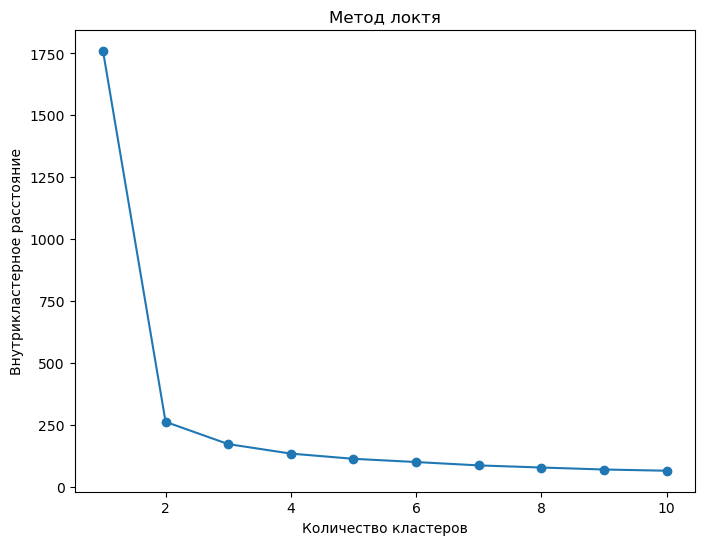

In [9]:
# Определяем внутрикластерное расстояние для разного количества кластеров
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(text_vectors)
    inertia.append(kmeans.inertia_)

# Строим график метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутрикластерное расстояние')
plt.title('Метод локтя')
plt.show()

Такой ***"странный"*** результат на графике мы получили так как в нашем датафрейме у части записей(патентов) в поле **'abstract'** стоит значение **"неопределено"**, так как данные этого поля не спарсились. Поэтому при работе с данными нам нужно выбросить из датафрейма те записи, в которых отсутствует текстовое описание.

***удаление из датафрейма строк с неопределенным описанием***

In [28]:
indexes_to_drop = df[df['abstract'] == 'неопределено'].index

# Удаляем строки
df = df.drop(indexes_to_drop)

# Переиндексация
df = df.reset_index(drop=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        651 non-null    object
 1   title     651 non-null    object
 2   abstract  651 non-null    object
dtypes: object(3)
memory usage: 15.4+ KB


***повторная векторизация***

In [38]:
# Представляем тексты в виде предложений (списков слов)
sentences = [text.split() for text in df['abstract']]

# Обучаем модель Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Получаем векторы для каждого текста путем усреднения векторов слов
text_vectors = np.array([np.mean([word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
                                 or [np.zeros(word2vec_model.vector_size)], axis=0) for sentence in sentences])

***метод локтя***

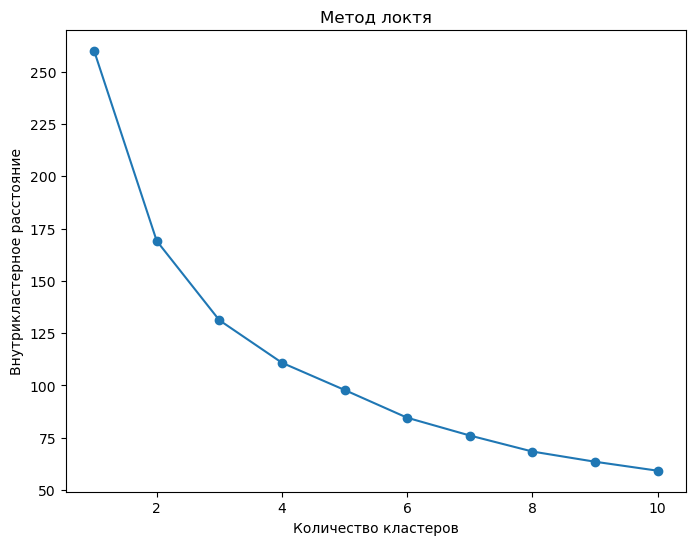

In [39]:
# Определяем внутрикластерное расстояние для разного количества кластеров
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(text_vectors)
    inertia.append(kmeans.inertia_)

# Строим график метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутрикластерное расстояние')
plt.title('Метод локтя')
plt.show()

Можем заметить, что количество кластеров 6-7 выглядит наиболее оптимальным.

In [49]:
# Кластеризуем полученные векторы текстов для 7 кластеров
algorithm = KMeans(n_clusters=7, random_state=42)
clusters = algorithm.fit_predict(text_vectors)

# Выводим количество элементов в каждом кластере
for cluster in range(algorithm.n_clusters):
    cluster_size = len(clusters[clusters == cluster])
    print(f"Cluster {cluster}: {cluster_size} элементов")

Cluster 0: 80 элементов
Cluster 1: 58 элементов
Cluster 2: 170 элементов
Cluster 3: 62 элементов
Cluster 4: 4 элементов
Cluster 5: 139 элементов
Cluster 6: 138 элементов


Дополнительно проверим качество кластеризации применив к полученным результатам метод силуэта, суть которого заключается в следующем:

1. Для каждого объекта вычисляется силуэт, который представляет собой отношение разности между средним расстоянием до объектов внутри кластера и средним расстоянием до объектов в ближайшем кластере, к максимальному из этих двух расстояний.
2. Средний силуэт для всех объектов в выборке дает общую оценку качества кластеризации.

* Значение силуэта близкое к 1 указывает на хорошую кластеризацию, где объекты внутри кластеров находятся ближе друг к другу, чем к объектам из других кластеров.
* Значение силуэта близкое к 0 указывает на перекрывающиеся кластеры, где объекты находятся на границе между кластерами.
* Значение силуэта менее 0 указывает на неправильную кластеризацию, где объекты неверно отнесены к кластерам.

In [41]:
# Оцениваем качество кластеризации с помощью Silhouette Score
silhouette_avg = silhouette_score(text_vectors, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.25800356


Мы провели кластеризацию данных. Теперь добавим метки кластеров к нашему датафрейму, для дальнейшей работы и интерпретации результатов.

In [42]:
# Создаем Series с метками кластеров
cluster_series = pd.Series(clusters, name='cluster_label')

# Добавляем Series с метками кластеров в датафрейм
df_with_clusters = pd.concat([df, cluster_series], axis=1)

In [43]:
df_with_clusters

,id,title,abstract,cluster_label
0,RU-100178-U1,безламповый осветительный устройство база свет...,1 осветительный устройство база светодиод соде...,0
1,RU-141792-U1,осветительный прибор,1 осветительный прибор содержать фокусировать ...,6
2,RU-142299-U1,автомобильный модуль освещение,1 автомобильный модуль освещение который содер...,0
3,RU-146781-U1,блокфара транспортный средство,1 блокфара транспортный средство который включ...,6
4,RU-151666-U1,устройство установка оптический линза осветите...,1 устройство установка оптический линза освети...,0
...,...,...,...,...
646,RU-2767453-C1,подсветка жидкокристаллический устройство отоб...,подсветка жидкокристаллический устройство отоб...,5
647,RU-2768510-C1,светодиодный светильник конвекционный охлаждение,заявить технический решение относиться область...,2
648,RU-2770597-C1,электрооптический конструктивный узел отвод те...,изобретение относиться электрооптический конст...,6
649,RU-83315-U1,самосветящийся душевая распылитель отводный от...,1 самосветящийся душевая распылитель отводный ...,6


Теперь мы можем попробовать интерпретировать результаты нашей кластеризации, чтобы извлечь какую-то информацию из полученных кластеров данных. 

Начать мы можем с поиска наиболее популярных слов и n-грамм по каждому из кластеров.

In [47]:
# Создаем словарь для хранения самых популярных сочетаний слов в каждом кластере
popular_phrases = {}

# Проходим по каждому кластеру
for cluster_label in df_with_clusters['cluster_label'].unique():
    # Получаем тексты для текущего кластера
    cluster_texts = df_with_clusters[df_with_clusters['cluster_label'] == cluster_label]['abstract']
    # Создаем список слов для текущего кластера
    words_list = ' '.join(cluster_texts).split()
    # Считаем частоту слов в текстах текущего кластера
    word_freq = Counter(words_list)
    # Сортируем слова по частоте и выбираем 5 самых популярных слов
    popular_words = word_freq.most_common(5)
    # Добавляем самые популярные слова в словарь для текущего кластера
    popular_phrases[cluster_label] = popular_words

# Сортируем ключи словаря popular_phrases по возрастанию
sorted_clusters = sorted(popular_phrases.keys())

# Выводим данные по кластерам в отсортированном порядке
for cluster_label in sorted_clusters:
    words = popular_phrases[cluster_label]
    print(f"Кластер {cluster_label}: {words}")

Кластер 0: [('свет', 351), ('элемент', 226), ('поверхность', 203), ('который', 199), ('первый', 195)]
Кластер 1: [('устройство', 88), ('осветительный', 79), ('модель', 68), ('светильник', 66), ('освещение', 66)]
Кластер 2: [('свет', 371), ('осветительный', 259), ('источник', 240), ('устройство', 239), ('содержать', 232)]
Кластер 3: [('который', 104), ('устройство', 87), ('свет', 87), ('светильник', 54), ('элемент', 52)]
Кластер 4: [('полезный', 4), ('модель', 4), ('относиться', 4), ('освещение', 4), ('область', 3)]
Кластер 5: [('устройство', 188), ('светодиодный', 186), ('который', 184), ('источник', 173), ('свет', 168)]
Кластер 6: [('свет', 366), ('который', 319), ('элемент', 254), ('содержать', 239), ('источник', 232)]


In [46]:
from nltk.util import ngrams

# Функция для получения n-грамм из текста
def get_ngrams(text, n):
    words = text.split()
    return [' '.join(gram) for gram in ngrams(words, n)]

# Создаем словарь для хранения самых популярных сочетаний слов в каждом кластере
popular_ngrams = {}

# Проходим по каждому кластеру
for cluster_label in df_with_clusters['cluster_label'].unique():
    # Получаем тексты для текущего кластера
    cluster_texts = df_with_clusters[df_with_clusters['cluster_label'] == cluster_label]['abstract']
    # Создаем список n-грамм для текущего кластера
    ngrams_list = [ngram for text in cluster_texts for ngram in get_ngrams(text, n=3)]  # Выберем двойки слов (биграммы)
    # Считаем частоту n-грамм в текстах текущего кластера
    ngram_freq = Counter(ngrams_list)
    # Сортируем n-граммы по частоте и выбираем 5 самых популярных
    popular_ngrams[cluster_label] = ngram_freq.most_common(5)

# Сортируем ключи словаря popular_ngrams по возрастанию
sorted_clusters = sorted(popular_ngrams.keys())

# Выводим данные по кластерам в отсортированном порядке
for cluster_label in sorted_clusters:
    ngrams = popular_ngrams[cluster_label]
    print(f"Кластер {cluster_label}: {ngrams}")

Кластер 0: [('малый мера один', 64), ('содержать малый мера', 28), ('технический результат являться', 24), ('изобретение относиться область', 23), ('относиться область светотехник', 21)]
Кластер 1: [('полезный модель относиться', 36), ('технический результат являться', 16), ('относиться область светотехник', 16), ('полезный модель являться', 14), ('модель относиться область', 12)]
Кластер 2: [('технический результат являться', 64), ('относиться область светотехник', 63), ('изобретение относиться область', 57), ('полезный модель относиться', 41), ('область светотехник технический', 24)]
Кластер 3: [('полезный модель относиться', 11), ('п 1 который', 10), ('изобретение относиться область', 10), ('выбирать группа состоять', 9), ('система п1 который', 8)]
Кластер 4: [('полезный модель относиться', 4), ('модель относиться область', 3), ('относиться область светодиодный', 1), ('область светодиодный осветительный', 1), ('светодиодный осветительный прибор', 1)]
Кластер 5: [('полезный модель от

Данный подход не дает нам достаточной информации при интерпретации результатов. Может показаться, будто кластеры пересекаются, хотя даже так мы можем получить некоторое представление о том, какая информация содержится в наших кластерах данных. 

Например:
* В кластер 0 входят патенты, в которых речь идет о компонентах осветительных приборов
* В кластер 2 входят патенты, в которых речь идет об источниках света в осветительных приборах

В обеих этих кластерах речь идет о каких-то малых технических устройствах

* В кластер 1 входят патенты, в которых речь идет о полноценных осветительных приборах
* В кластер 3 входят патенты, в которых речь идет об элементах полноценных осветительных устройств
* В кластер 4 входят патенты, в которых речь идет о светодиодных устройствах
* В кластер 5 входят патенты, в которых речь идет о устройствах из области светотехники, в которых в качестве источника света выступают светодиоды
* В кластер 6 входят патенты, в которых речь идет о компонентах осветительных приборов.

Пойдем дальше и попробуем извлечь больше полезной информации из полученных результатов кластеризации, для этого применим следующие методы анализа текста:

* LDA
* Облако слов

LDA (Latent Dirichlet Allocation) в области обработки естественного языка (NLP) является статистической моделью, используемой для выявления тематик в коллекции документов. Он основан на вероятностном представлении документов как смеси различных тем, а каждая тема представлена как смесь различных слов.

Облако слов (или word cloud) — это визуальное представление текстовой информации, в котором наиболее часто встречающиеся слова изображаются более крупным шрифтом, а менее часто встречающиеся слова — меньшим шрифтом или вообще исключаются из облака. Облако слов помогает быстро оценить ключевые темы или основные слова в наборе текстовых данных.

Применим эти методы к нашим данным в рамках полученных кластеров и ипопробуем дать небольшую интерпретацию:

In [ ]:
# Задаем стоп-слова
stop_words = stopwords.words('russian')

***функция анализа кластера***

In [60]:
def analyze_cluster(cluster_id):
    print(f"Анализ кластера {cluster_id}:\n")

    # Получаем тексты для выбранного кластера
    cluster_texts = df_with_clusters[df_with_clusters['cluster_label'] == cluster_id]['abstract']

    # Преобразуем тексты в список слов
    all_words = ' '.join(cluster_texts).split()

    # Анализ ключевых слов
    word_freq = Counter([word for word in all_words if word not in stop_words])
    print("Самые популярные слова:")
    print(word_freq.most_common(10))

    # Тематическое моделирование (LDA)
    # Создаем словарь
    dictionary = Dictionary([text.split() for text in cluster_texts])
    # Создаем корпус
    corpus = [dictionary.doc2bow(text.split()) for text in cluster_texts]
    # Обучаем модель LDA
    lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)
    # Выводим темы
    print("\nТемы, выявленные с использованием LDA:\n")
    for idx, topic in lda_model.print_topics(-1):
        print(f"Тема {idx}: {topic}\n")

    # Визуализация с помощью облака слов
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(' '.join(all_words))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Облако слов для кластера {cluster_id}")
    plt.show()

***анализ кластеров***

Анализ кластера 0:

Самые популярные слова:
[('свет', 351), ('элемент', 226), ('поверхность', 203), ('который', 199), ('первый', 195), ('источник', 179), ('осветительный', 161), ('малый', 160), ('мера', 159), ('содержать', 156)]

Темы, выявленные с использованием LDA:
Тема 0: 0.041*"свет" + 0.027*"поверхность" + 0.024*"малый" + 0.024*"мера" + 0.020*"элемент" + 0.018*"источник" + 0.016*"первый" + 0.015*"который" + 0.014*"часть" + 0.014*"корпус"
Тема 1: 0.033*"первый" + 0.032*"свет" + 0.028*"элемент" + 0.022*"второй" + 0.022*"осветительный" + 0.018*"содержать" + 0.016*"устройство" + 0.016*"который" + 0.013*"1" + 0.013*"источник"
Тема 2: 0.020*"который" + 0.017*"корпус" + 0.014*"свет" + 0.014*"модуль" + 0.014*"источник" + 0.012*"поверхность" + 0.012*"светодиодный" + 0.010*"выполнить" + 0.010*"осветительный" + 0.010*"иметь"


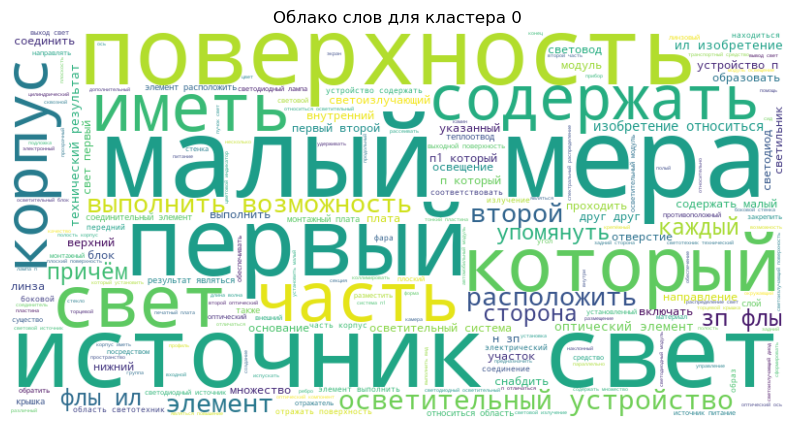

Анализ кластера 1:

Самые популярные слова:
[('устройство', 88), ('осветительный', 79), ('модель', 68), ('светильник', 66), ('освещение', 66), ('полезный', 66), ('светодиодный', 65), ('результат', 62), ('относиться', 57), ('корпус', 57)]

Темы, выявленные с использованием LDA:
Тема 0: 0.017*"осветительный" + 0.017*"светильник" + 0.016*"устройство" + 0.012*"выполнить" + 0.012*"результат" + 0.012*"модель" + 0.012*"полезный" + 0.011*"корпус" + 0.011*"технический" + 0.011*"относиться"
Тема 1: 0.022*"устройство" + 0.018*"осветительный" + 0.016*"освещение" + 0.014*"участок" + 0.013*"система" + 0.012*"освещать" + 0.008*"свет" + 0.008*"средство" + 0.008*"дорога" + 0.008*"относиться"
Тема 2: 0.024*"светодиодный" + 0.014*"полезный" + 0.014*"модель" + 0.012*"светильник" + 0.010*"результат" + 0.010*"корпус" + 0.009*"блок" + 0.009*"источник" + 0.009*"свет" + 0.009*"относиться"


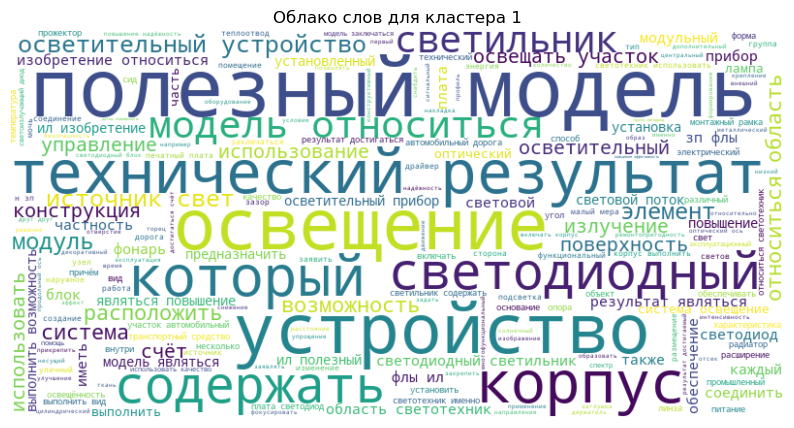

Анализ кластера 2:

Самые популярные слова:
[('свет', 371), ('осветительный', 259), ('источник', 240), ('устройство', 239), ('содержать', 232), ('светодиодный', 225), ('который', 200), ('элемент', 188), ('выполнить', 188), ('корпус', 175)]

Темы, выявленные с использованием LDA:
Тема 0: 0.019*"осветительный" + 0.016*"свет" + 0.015*"модуль" + 0.014*"элемент" + 0.014*"который" + 0.013*"устройство" + 0.013*"содержать" + 0.011*"источник" + 0.011*"выполнить" + 0.011*"светодиодный"
Тема 1: 0.024*"светодиодный" + 0.017*"корпус" + 0.014*"выполнить" + 0.013*"светильник" + 0.011*"который" + 0.011*"плата" + 0.010*"светодиод" + 0.010*"элемент" + 0.009*"содержать" + 0.009*"источник"
Тема 2: 0.032*"свет" + 0.017*"устройство" + 0.016*"источник" + 0.014*"осветительный" + 0.014*"содержать" + 0.012*"освещение" + 0.012*"первый" + 0.011*"световой" + 0.009*"поверхность" + 0.009*"иметь"


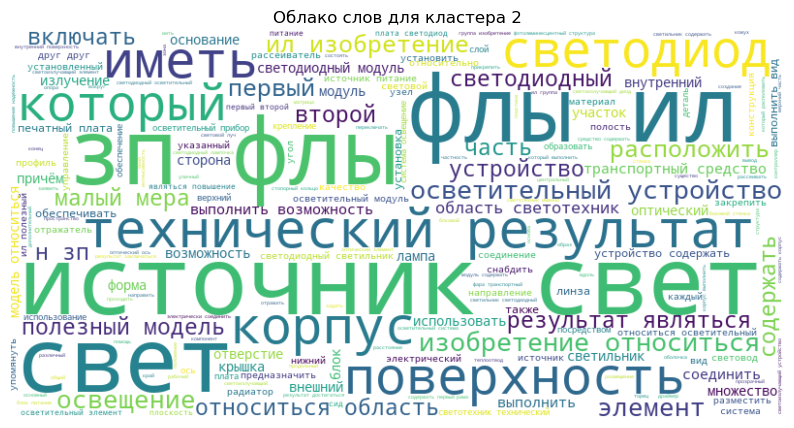

Анализ кластера 3:

Самые популярные слова:
[('который', 104), ('устройство', 87), ('свет', 87), ('светильник', 54), ('элемент', 52), ('содержать', 52), ('источник', 52), ('осветительный', 50), ('выполнить', 48), ('лампа', 46)]

Темы, выявленные с использованием LDA:
Тема 0: 0.009*"который" + 0.008*"лампа" + 0.006*"элемент" + 0.005*"фитиль" + 0.005*"состоять" + 0.005*"1" + 0.005*"выполнить" + 0.005*"содержать" + 0.005*"очаг" + 0.004*"группа"
Тема 1: 0.010*"устройство" + 0.008*"корпус" + 0.006*"светильник" + 0.006*"который" + 0.006*"свет" + 0.005*"линия" + 0.005*"качество" + 0.005*"световой" + 0.005*"выполнить" + 0.005*"использовать"
Тема 2: 0.013*"свет" + 0.012*"который" + 0.010*"устройство" + 0.008*"источник" + 0.006*"осветительный" + 0.006*"освещение" + 0.006*"светильник" + 0.005*"содержать" + 0.005*"элемент" + 0.005*"система"


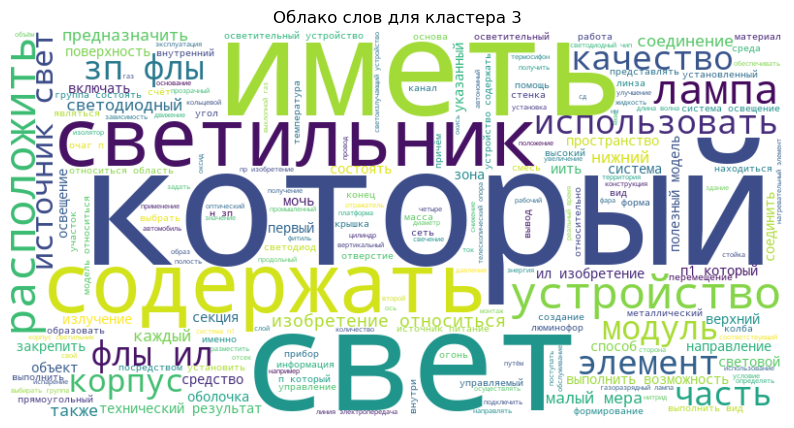

Анализ кластера 4:

Самые популярные слова:
[('полезный', 4), ('модель', 4), ('относиться', 4), ('освещение', 4), ('область', 3), ('осветительный', 3), ('устройство', 3), ('прибор', 2), ('использование', 2), ('светодиод', 2)]

Темы, выявленные с использованием LDA:
Тема 0: 0.055*"освещение" + 0.055*"модель" + 0.055*"относиться" + 0.055*"полезный" + 0.031*"светодиод" + 0.031*"промышленный" + 0.031*"осветительный" + 0.031*"использовать" + 0.031*"зона" + 0.031*"помещение"
Тема 1: 0.048*"область" + 0.048*"осветительный" + 0.048*"прибор" + 0.048*"светодиодный" + 0.048*"дорога" + 0.048*"относиться" + 0.048*"использование" + 0.048*"полезный" + 0.048*"улица" + 0.048*"цель"
Тема 2: 0.067*"устройство" + 0.039*"область" + 0.038*"использовать" + 0.038*"осветительный" + 0.038*"промышленный" + 0.038*"полезный" + 0.038*"использование" + 0.038*"светодиод" + 0.038*"именно" + 0.038*"иить"


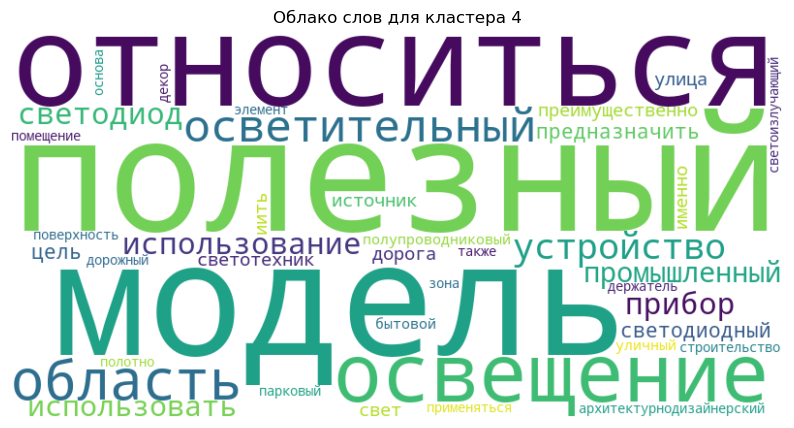

Анализ кластера 5:

Самые популярные слова:
[('устройство', 188), ('светодиодный', 186), ('который', 184), ('источник', 173), ('свет', 168), ('элемент', 160), ('содержать', 160), ('корпус', 135), ('светодиод', 127), ('ил', 119)]

Темы, выявленные с использованием LDA:
Тема 0: 0.014*"свет" + 0.013*"который" + 0.012*"осветительный" + 0.010*"устройство" + 0.009*"лампа" + 0.007*"изобретение" + 0.007*"содержать" + 0.007*"источник" + 0.006*"ил" + 0.006*"корпус"
Тема 1: 0.012*"светодиодный" + 0.012*"устройство" + 0.009*"светильник" + 0.009*"корпус" + 0.009*"светодиод" + 0.008*"содержать" + 0.008*"который" + 0.007*"модуль" + 0.007*"световой" + 0.007*"элемент"
Тема 2: 0.012*"элемент" + 0.012*"источник" + 0.010*"светодиодный" + 0.009*"который" + 0.009*"свет" + 0.008*"содержать" + 0.007*"устройство" + 0.007*"выполнить" + 0.007*"часть" + 0.006*"питание"


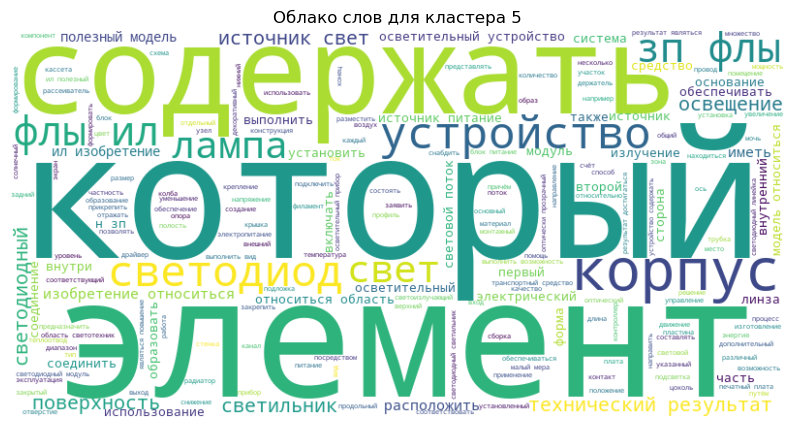

Анализ кластера 6:

Самые популярные слова:
[('свет', 366), ('который', 319), ('элемент', 254), ('содержать', 239), ('источник', 232), ('1', 226), ('мера', 220), ('малый', 211), ('корпус', 193), ('выполнить', 191)]

Темы, выявленные с использованием LDA:
Тема 0: 0.024*"свет" + 0.017*"который" + 0.014*"источник" + 0.012*"содержать" + 0.011*"осветительный" + 0.010*"элемент" + 0.010*"мера" + 0.010*"малый" + 0.010*"устройство" + 0.009*"первый"
Тема 1: 0.017*"светодиодный" + 0.014*"элемент" + 0.013*"свет" + 0.013*"поверхность" + 0.009*"малый" + 0.009*"который" + 0.009*"мера" + 0.009*"выполнить" + 0.009*"участок" + 0.008*"содержать"
Тема 2: 0.017*"1" + 0.016*"который" + 0.011*"содержать" + 0.011*"корпус" + 0.010*"элемент" + 0.010*"мера" + 0.010*"выполнить" + 0.009*"п" + 0.009*"2" + 0.009*"поверхность"


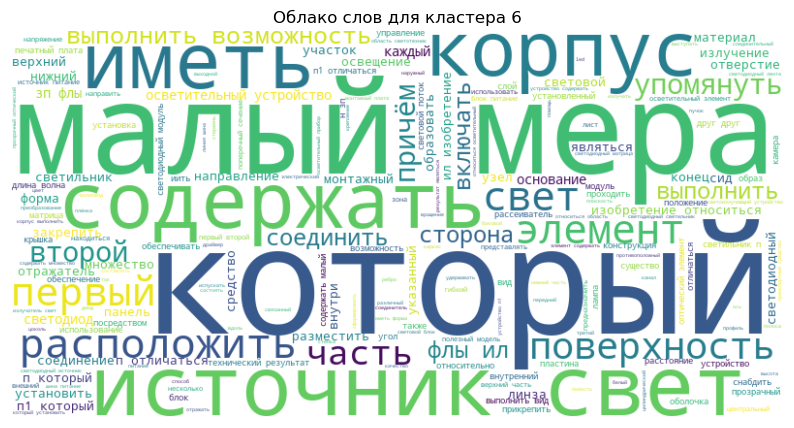

In [62]:
for cluster_id in range(7):
    analyze_cluster(cluster_id)

Исходя из результатов анализа кластеров, теперь мы можем сделать более явные выводы о природе данных в них.

* Кластер 0: в нем речь идет о малых элементах осветительных приборах, которые являются источниками света.
* Кластер 1: в нем речь идет о полноценных освещающих устройствах, среди которых много светодиодных
* Кластер 2: в нем речь идет о осветительных приборах, в которых в качестве источника света выступают светодиодные элементы
* Кластер 3: в нем речь идет о полноценных осветительных приборах, таких как светильники и лампы
* Кластер 4: в нем речь идет о светотехнических моделях, которые могут применять в промышленных целях
* Кластер 5: в нем речь идет о элементах, которые содержат крупные осветительные приборы
* Кластер 6: кластер 6 похож на кластер 0, за тем исключением, что в рамках кластера 6 речь идет также об освещении поверхностей

# 4. Загрузка собственного патента

Теперь, когда у нас есть

* методы для предобработки данных
* обученная модель для векторизации данных
* модель кластеризации данных

Мы можем загрузить свой патент, который ранее не использовался при обучении модели векторизации данных, и определить, к какому из выделенных кластеров, он относится.

*Повторная кластеризация данных на случай перезапуска блокнота*

***импорт патента из локальной памяти***

In [30]:
json_file_path = json_file_path = r'C:\Users\egor_\Desktop\Jupyter Notebook\Диплом\jsons\RU-165859-U1.json'
df_test = json_to_dataframe(json_file_path)

In [31]:
df_test

,id,title,assignee,inventorOrAuthor,priorityDate,filingOrCreationDate,publicationDate,grantDate,abstract,description,urlGoogle,classifications,claims,applicationEvents
0,RU-165859-U1,Осветительное устройство,Федеральное государственное бюджетное образова...,"Флюр Рашитович Исмагилов, Ирек Ханифович Хайру...",2016-03-30,2016-03-30,2016-11-10,2016-11-10,"1. Осветительное устройство, состоящее из полу...",Заявляемая полезная модель относится к электро...,https://patents.google.com/patent/RU165859U1/ru,"[{'id': 'F21S9/02', 'description': 'Lighting d...","[{'text': '1. Осветительное устройство, состоя...","[{'date': '2016-03-30', 'assignee': 'Applicati..."


In [32]:
patent_text = df_test.loc[0]['abstract']
print(patent_text)

1. Осветительное устройство, состоящее из полупроводникового термоэлектрического генератора, радиатора охлаждения и осветительного элемента, отличающееся тем, что с осветительным элементом соединены разъемы с выключателем с возможностью подключения к источнику электрической энергии, переключатель режимов работы, выполненный с возможностью соединения осветительного элемента с выводами электрической сети через фотореле с датчиком освещения или с выводами аккумуляторной батареи, с которыми соединен фотоэлемент.2. Осветительное устройство по п. 1, отличающееся тем, что содержит батарею из ряда фотоэлементов, соединенных в одну цепь.


In [33]:
patent_text = preprocess_text(patent_text)

***функция определения принадлежности патента к выделенным кластерам***

Параметры:
    
* text - текст патента
* word2vec_model - обученная модель векторизации данных
* kmeans_model - обученная модель кластеризации

In [35]:
def predict_cluster(text, word2vec_model, kmeans_model):
    preprocessed_text = preprocess_text(text)
    # Преобразование текста в вектор
    text_vector = np.mean([word2vec_model.wv[word] for word in preprocessed_text.split() if word in word2vec_model.wv] 
                          or [np.zeros(word2vec_model.vector_size)], axis=0)
    # Предсказание кластера
    cluster = kmeans_model.predict(text_vector.reshape(1, -1))[0]
    return cluster

In [40]:
# Пример использования функции для предсказания кластера нового патента
cluster_prediction = predict_cluster(patent_text, word2vec_model, algorithm)
print("Предсказанный кластер:", cluster_prediction)

Предсказанный кластер: 0


Теперь мы знаем, к какому кластеру относится наш патент.

С помощью нашего модуля мы можем соотнести темы, популярные слова и выражения из нашего патента с темами и популярными выражениями кластера, к которому был отнесен патент.

***функция анализа патента***

In [56]:
def analyze_patent(patent_text):
    print("Анализ патента:\n")
    
    # Преобразуем текст в список слов
    patent_words = word_tokenize(patent_text.lower())
    
    # Анализ ключевых слов
    word_freq = Counter([word for word in patent_words if word not in stop_words])
    print("Самые популярные слова:")
    print(word_freq.most_common(10))
    
    # Тематическое моделирование (LDA)
    # Создаем словарь
    dictionary = Dictionary([patent_words])
    # Создаем корпус
    corpus = [dictionary.doc2bow(patent_words)]
    # Обучаем модель LDA
    lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)
    # Выводим темы
    print("\nТемы, выявленные с использованием LDA:\n")
    for idx, topic in lda_model.print_topics(-1):
        print(f"Тема {idx}: {topic}\n")
    
    # Визуализация с помощью облака слов
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(' '.join(patent_words))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Облако слов для патента")
    plt.show()

Соотнесение информации по патенту с информацией из кластера

In [43]:
cluster_id = cluster_prediction

Анализ патента:

Самые популярные слова:
[('осветительный', 5), ('элемент', 3), ('соединить', 3), ('1', 2), ('устройство', 2), ('отличаться', 2), ('возможность', 2), ('электрический', 2), ('вывод', 2), ('батарея', 2)]

Темы, выявленные с использованием LDA:
Тема 0: 0.080*"осветительный" + 0.050*"элемент" + 0.050*"соединить" + 0.035*"батарея" + 0.035*"возможность" + 0.035*"электрический" + 0.035*"устройство" + 0.035*"вывод" + 0.035*"отличаться" + 0.035*"1"

Тема 1: 0.026*"осветительный" + 0.026*"соединить" + 0.026*"элемент" + 0.026*"1" + 0.026*"отличаться" + 0.026*"вывод" + 0.026*"устройство" + 0.026*"возможность" + 0.026*"электрический" + 0.026*"батарея"

Тема 2: 0.026*"соединить" + 0.026*"осветительный" + 0.026*"вывод" + 0.026*"устройство" + 0.026*"электрический" + 0.026*"элемент" + 0.026*"отличаться" + 0.026*"1" + 0.026*"возможность" + 0.026*"батарея"



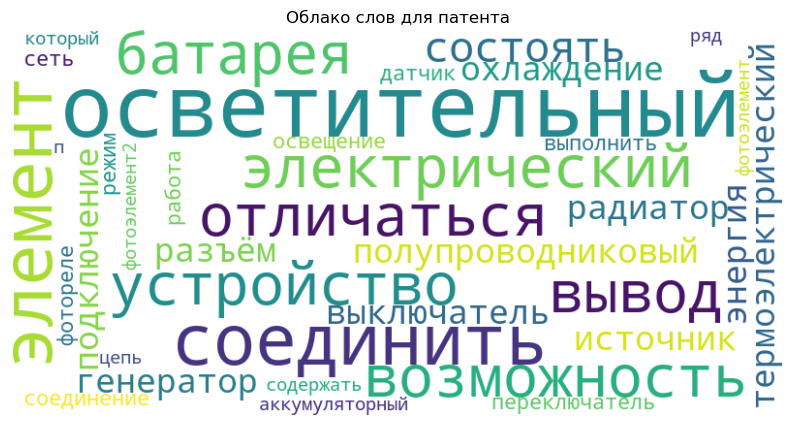

Анализ кластера 0:

Самые популярные слова:
[('свет', 283), ('осветительный', 229), ('устройство', 217), ('источник', 199), ('содержать', 189), ('светодиодный', 186), ('который', 158), ('элемент', 152), ('выполнить', 148), ('освещение', 141)]

Темы, выявленные с использованием LDA:

Тема 0: 0.020*"светодиодный" + 0.018*"светильник" + 0.016*"корпус" + 0.014*"свет" + 0.013*"выполнить" + 0.013*"который" + 0.011*"источник" + 0.011*"полезный" + 0.011*"модель" + 0.011*"профиль"

Тема 1: 0.015*"устройство" + 0.015*"светодиодный" + 0.014*"осветительный" + 0.014*"светодиод" + 0.012*"содержать" + 0.010*"первый" + 0.010*"поверхность" + 0.009*"освещение" + 0.009*"элемент" + 0.009*"модуль"

Тема 2: 0.032*"свет" + 0.022*"осветительный" + 0.020*"источник" + 0.019*"устройство" + 0.015*"содержать" + 0.013*"элемент" + 0.012*"модуль" + 0.011*"который" + 0.010*"освещение" + 0.010*"относиться"



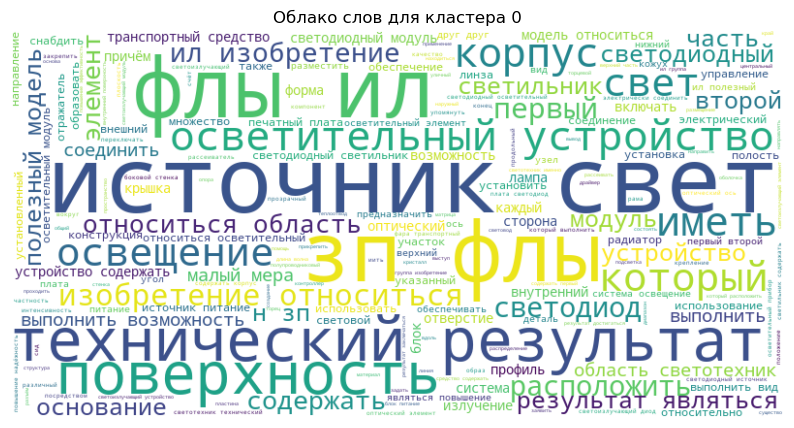

In [61]:
analyze_patent(patent_text)
analyze_cluster(cluster_prediction)

Исходя из полученных облаков слов и тем, можем сделать вывод, что модель корректно отнесла наш патент к кластеру 0.

В кластере 0 речь идет о малых элементах осветительных приборов, которые являются источниками света.

В нашем патенте речь идет об осветительном устройстве, ключевой особенностью которого является то, *"что с осветительным элементом соединены разъемы с выключателем с возможностью подключения к источнику электрической энергии, переключатель режимов работы, выполненный с возможностью соединения осветительного элемента с выводами электрической сети через фотореле с датчиком освещения или с выводами аккумуляторной батареи, с которыми соединен фотоэлемент*